<a href="https://colab.research.google.com/github/roapple10/Python-learning-note/blob/main/%E6%A8%99%E6%BA%96%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E5%81%9A%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NN model

In [9]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D,Lambda, concatenate
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K

In [4]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Start

In [ ]:
len(x_train)

60000

In [ ]:
x_train[9487].shape

(28, 28)

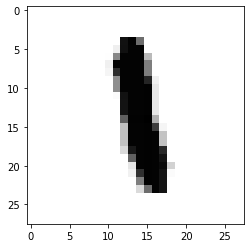

In [ ]:
plt.imshow(x_train[9487],cmap='Greys')

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)

In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

In [ ]:
model.add(Dense(500))

In [ ]:
model.add(Activation('sigmoid'))

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='mse', optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 500)               392500    
                                                                 
 activation_13 (Activation)  (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 activation_14 (Activation)  (None, 500)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5010      
                                                                 
 activation_15 (Activation)  (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

一次要訓練幾筆資料(batch_size) 我們就100筆調一次參數在此例 

這六萬筆資料一共要訓練幾次(epochs),我們訓練個20次試試

In [ ]:
model.fit(x_train,y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 0.0825 - accuracy: 0.3368
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0623 - accuracy: 0.6374
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0443 - accuracy: 0.7724
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.8405
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0254 - accuracy: 0.8735
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0213 - accuracy: 0.8880
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0186 - accuracy: 0.8985
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0168 - accuracy: 0.9058
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0155 - accuracy: 0.9111
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9160

In [ ]:
from ipywidgets import interact_manual

In [ ]:
from ipywidgets import interact_manual
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
# predict = model.predict_classes(x_test)

def test(num):
  plt.imshow(x_test[num].reshape(28,28), cmap="Greys")
  print("Predict:",classes_x[num])

In [ ]:
interact_manual(test, num=(0,9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.test>

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# model_json = model.to_json()
# open('handwriter.json','w').write(model_json)
# model.save_weights('handwriter_weights.h5')

## CNN

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_train[9487].shape

(28, 28, 1)

In [ ]:
X = x_train[9487][:,:,0]
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

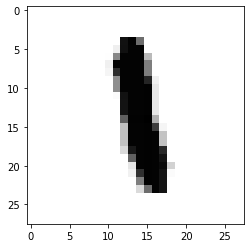

In [ ]:
plt.imshow(X, cmap='Greys')

In [ ]:
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.05), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_21 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 activation_22 (Activation)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [ ]:
model.fit(x_train,y_train,batch_size=100,epochs=15)

Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0019 - accuracy: 0.9883
Epoch 2/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0016 - accuracy: 0.9905
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0014 - accuracy: 0.9919
Epoch 4/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0012 - accuracy: 0.9931
Epoch 5/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0011 - accuracy: 0.9937
Epoch 6/15
600/600 [==============================] - 3s 4ms/step - loss: 9.7438e-04 - accuracy: 0.9943
Epoch 7/15
600/600 [==============================] - 3s 4ms/step - loss: 8.8600e-04 - accuracy: 0.9949
Epoch 8/15
600/600 [==============================] - 3s 4ms/step - loss: 8.2777e-04 - accuracy: 0.9953
Epoch 9/15
600/600 [==============================] - 3s 4ms/step - loss: 7.5537e-04 - accuracy: 0.9959
Epoch 10/15
600/600 [==============================] - 3s 4ms/step - loss: 6.6815e-0

In [ ]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0019 - accuracy: 0.9873


In [ ]:
# model_json = model.to_json()
# open('handwriter.json','w').write(model_json)
# model.save_weights('handwriter_weights.h5')

In [ ]:
from ipywidgets import interact_manual
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

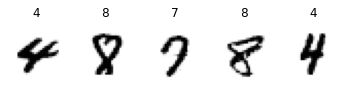

In [ ]:
pick = np.random.randint(1,9999,5)

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
  plt.title(classes_x[pick[i]])
  plt.axis("off")


## RNN

In [ ]:
from keras.datasets import imdb

In [ ]:
(x_train, y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

In [ ]:
len(x_train)

25000

In [ ]:
len(x_test)

25000

In [ ]:
x_train[99]

In [ ]:
for i in range(10):
  print(len(x_train[i]), end=', ')

218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 

In [ ]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
from keras.preprocessing import sequence

In [ ]:
x_train = sequence.pad_sequences(x_train,maxlen=100)
x_test = sequence.pad_sequences(x_test,maxlen=100)

In [ ]:
x_train.shape

(25000, 100)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(10000,128))

In [ ]:
model.add(LSTM(150))

In [ ]:
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 150)               167400    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 1,447,551
Trainable params: 1,447,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,
          batch_size=32,
          epochs=15)

Epoch 1/15
782/782 [==============================] - 15s 9ms/step - loss: 0.4258 - accuracy: 0.8008
Epoch 2/15
782/782 [==============================] - 7s 9ms/step - loss: 0.2608 - accuracy: 0.8940
Epoch 3/15
782/782 [==============================] - 7s 9ms/step - loss: 0.1871 - accuracy: 0.9282
Epoch 4/15
782/782 [==============================] - 7s 9ms/step - loss: 0.1309 - accuracy: 0.9530
Epoch 5/15
782/782 [==============================] - 7s 9ms/step - loss: 0.0879 - accuracy: 0.9700
Epoch 6/15
782/782 [==============================] - 8s 10ms/step - loss: 0.0648 - accuracy: 0.9787
Epoch 7/15
782/782 [==============================] - 7s 9ms/step - loss: 0.0495 - accuracy: 0.9844
Epoch 8/15
782/782 [==============================] - 7s 9ms/step - loss: 0.0463 - accuracy: 0.9841
Epoch 9/15
782/782 [==============================] - 7s 9ms/step - loss: 0.0313 - accuracy: 0.9898
Epoch 10/15
782/782 [==============================] - 8s 10ms/step - loss: 0.0220 - accuracy: 0.9

In [ ]:
score= model.evaluate(x_test,y_test)

782/782 [==============================] - 4s 4ms/step - loss: 0.9933 - accuracy: 0.8308


In [ ]:
print('Testing data Loss', score[0])
print('Testing data accuracy', score[1])

Testing data Loss 0.9933375716209412
Testing data accuracy 0.8307600021362305


In [ ]:
#Save the model
model_json = model.to_json()
open('imdb_architecture.json', 'w').write(model_json)
model.save_weights('imdb_model_weights.h5')

In [ ]:
#Save the model(option 2)
model.save('myrnn.h5')

## Sequential

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

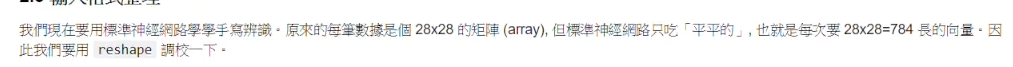

In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

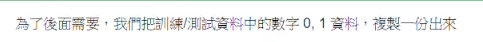

In [ ]:
x_train_01 = x_train[y_train <=1]
x_test_01 = x_test[y_test <=1]

image.png

In [ ]:
# x_train_01 = x_train[y_train <=1]
# x_test_01 = x_test[y_test <=1]
y_train_10 = np_utils.to_categorical(y_train,10)
y_test_10 = np_utils.to_categorical(y_test,10)

y_train_01 = y_train[y_train <= 1]
y_train_01 = np_utils.to_categorical(y_train_01,2)

y_test_01 = y_test[y_test <= 1]
y_test_01 = np_utils.to_categorical(y_test_01,2)

In [ ]:
x_train_01.shape, x_test_01.shape

((12665, 784), (2115, 784))

In [ ]:
y_train_01.shape, y_test_01.shape

((12665, 2), (2115, 2))

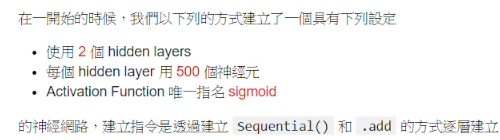

In [ ]:
model = Sequential()

model.add(Dense(500,input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

In [ ]:
model.layers

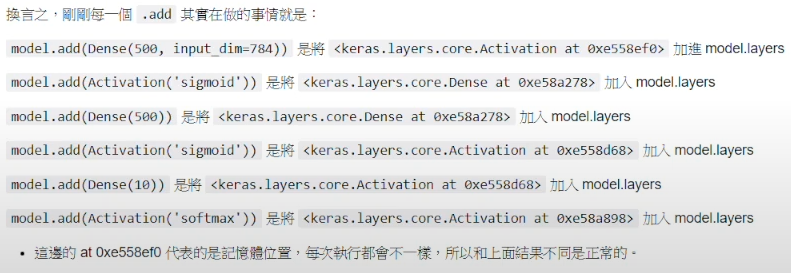

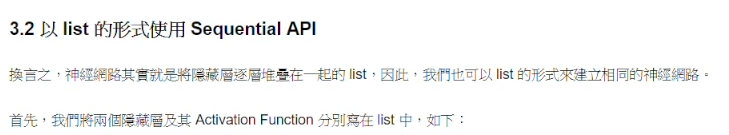

In [ ]:
first_layer = [Dense(500,input_dim=784),Activation('sigmoid')]
second_layer = [Dense(500),Activation('sigmoid')]
output_layer = [Dense(10),Activation('softmax')]


In [ ]:
first_layer + second_layer +output_layer

In [ ]:
model = Sequential(first_layer + second_layer +output_layer)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 activation_3 (Activation)   (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 activation_4 (Activation)   (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5010      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

In [ ]:
all_except_last =[Dense(500,input_dim=784),Activation('sigmoid'),
                 Dense(500),Activation('sigmoid')]
output_layer = [Dense(10),Activation('softmax')]
model_0_to_9 =  Sequential(all_except_last  +output_layer)
model_0_to_9.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 500)               392500    
                                                                 
 activation_9 (Activation)   (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 500)               250500    
                                                                 
 activation_10 (Activation)  (None, 500)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                5010      
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-tr

In [ ]:
new_output_layer = [Dense(2),Activation('softmax')]

model_0_to_1 = Sequential(all_except_last+new_output_layer)
model_0_to_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 500)               392500    
                                                                 
 activation_9 (Activation)   (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 500)               250500    
                                                                 
 activation_10 (Activation)  (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 2)                 1002      
                                                                 
 activation_12 (Activation)  (None, 2)                 0         
                                                                 
Total params: 644,002
Trainable params: 644,002
Non-tr

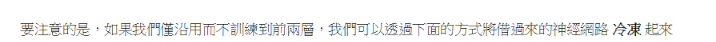

In [ ]:
for layer in all_except_last:
  layer.trainable=False

In [ ]:
model_0_to_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 500)               392500    
                                                                 
 activation_9 (Activation)   (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 500)               250500    
                                                                 
 activation_10 (Activation)  (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 2)                 1002      
                                                                 
 activation_12 (Activation)  (None, 2)                 0         
                                                                 
Total params: 644,002
Trainable params: 1,002
Non-trai

In [ ]:
model_0_to_1.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
x_train_01.shape, y_train_01.shape

((12665, 784), (12665, 2))

In [ ]:
model_0_to_1.fit(x_train_01, y_train_01, batch_size=100, epochs=5)

Epoch 1/5
127/127 [==============================] - 1s 3ms/step - loss: 0.1294 - accuracy: 0.7953
Epoch 2/5
127/127 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9950
Epoch 3/5
127/127 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9955
Epoch 4/5
127/127 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9959
Epoch 5/5
127/127 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9960


In [ ]:
score = model_0_to_1.evaluate(x_test_01, y_test_01)

67/67 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9972


In [ ]:
print('Testing data Loss', score[0])
print('Testing data accuracy', score[1])

Testing data Loss 0.006679043639451265
Testing data accuracy 0.9971631169319153


Transfer Learning

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_train_01 = x_train[y_train <=1]
x_test_01 = x_test[y_test <=1]
y_train_10 = np_utils.to_categorical(y_train,10)
y_test_10 = np_utils.to_categorical(y_test,10)

y_train_01 = y_train[y_train <= 1]
y_train_01 = np_utils.to_categorical(y_train_01,2)

y_test_01 = y_test[y_test <= 1]
y_test_01 = np_utils.to_categorical(y_test_01,2)

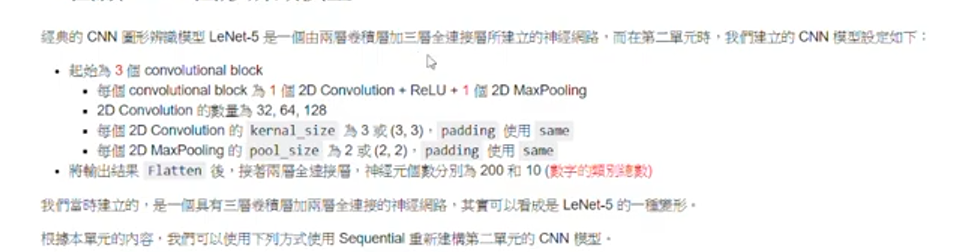

In [ ]:
conv_layer = [Conv2D(32,(3,3), padding='same', input_shape=(28,28,1)),
              Activation('relu'),
              MaxPooling2D(pool_size=(2,2)),

              Conv2D(64,(3,3), padding='same'),
              Activation('relu'),
              MaxPooling2D(pool_size=(2,2)),

              Conv2D(128,(3,3), padding='same'),
              Activation('relu'),
              MaxPooling2D(pool_size=(2,2))]

# We put Flatten, and 2 fully-connected layers together, called fc_layer

fc_layer = [Flatten(),
            Dense(200),
            Activation('relu'),
            Dense(10),
            Activation('softmax')]
model = Sequential(conv_layer + fc_layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

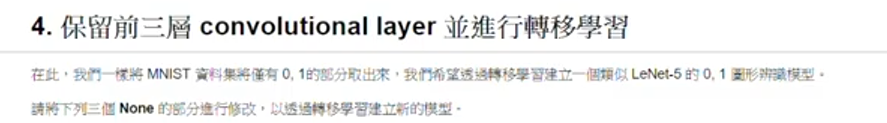

In [ ]:
new_fc_layer = [Flatten(),
                Dense(200),
                Activation('relu'),
                Dense(2), 
                Activation('softmax')]

model_0_to_1 = Sequential(conv_layer+new_fc_layer)
model_0_to_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
for layer in conv_layer:
  layer.trainable=False

In [ ]:
model_0_to_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
model_0_to_1.compile(loss='mse',optimizer=SGD(lr=0.1), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_0_to_1.fit(x_train_01,y_train_01, batch_size=100, epochs=5)

Epoch 1/5
127/127 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.5323
Epoch 2/5
127/127 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.5323
Epoch 3/5
127/127 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.5323
Epoch 4/5
127/127 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.5323
Epoch 5/5
127/127 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.5323


In [ ]:
score = model_0_to_1.evaluate(x_test_01, y_test_01)
print("Train",score[0])
print("Test",score[1])

67/67 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.5366
Train 0.46335744857788086
Test 0.5366430282592773


Functional API: Model

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [7]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

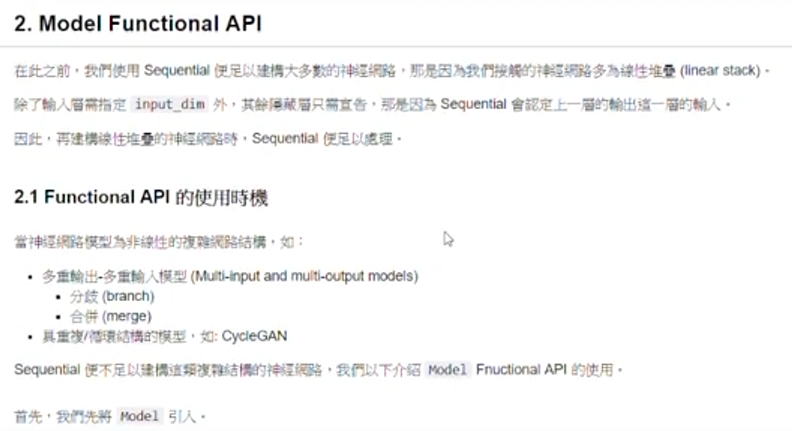

In [8]:
from keras.models import Model

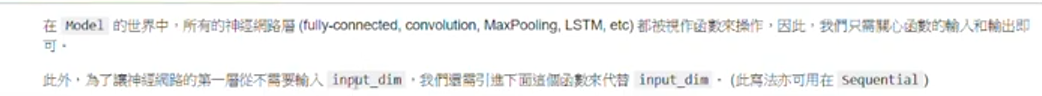

In [9]:
from keras.layers import Input

In [10]:
f_1 = Dense(500,activation='sigmoid')
f_2 = Dense(500,activation='sigmoid')
f_3 = Dense(10,activation='softmax')

In [11]:
x = Input(shape=(784,))

In [12]:
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [13]:
h_1 = f_1(x)
h_2 = f_2(h_1)
y = f_3(h_2)

In [14]:
model = Model(x,y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mse',optimizer=SGD(lr=0.1), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [17]:
model.fit(x_train,y_train, batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 4s 2ms/step - loss: 0.0828 - accuracy: 0.3846
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.6249
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 0.0446 - accuracy: 0.7544
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.8389
Epoch 5/5
600/600 [==============================] - 1s 2ms/step - loss: 0.0258 - accuracy: 0.8750


In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.8875


[0.022708073258399963, 0.887499988079071]

## 非線性堆疊

In [19]:
from keras.layers import concatenate, add

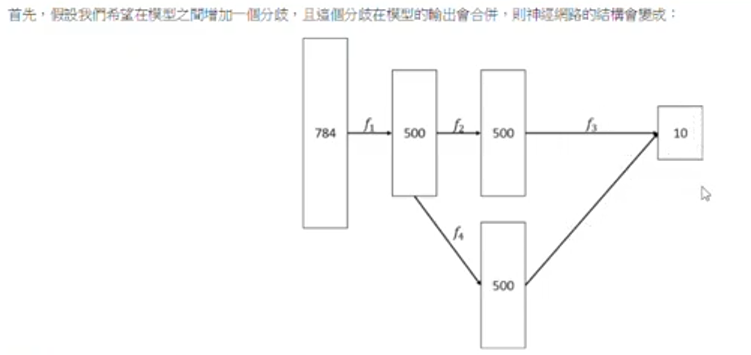

In [21]:
f_4 = Dense(500, activation='relu')
z = f_4(h_1)

#new f_3
f_3 = Dense(10,activation='softmax')

In [22]:
u = concatenate([h_2,z])
y=f_3(u)

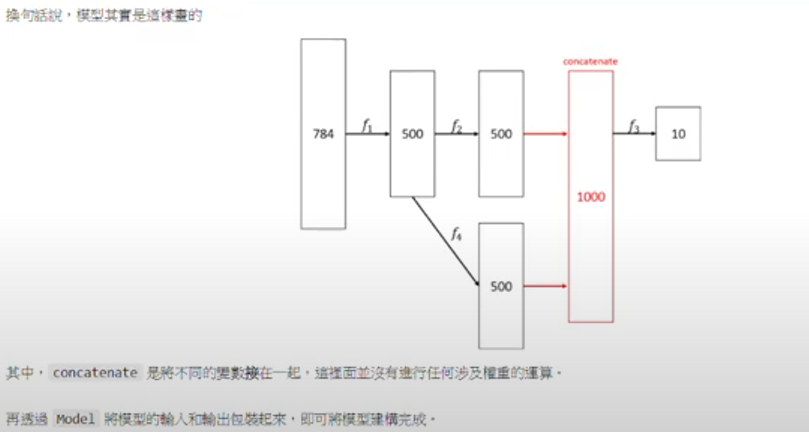

In [23]:
model = Model(x,y)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 500)          392500      ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 500)          250500      ['dense[0][0]']                  
                                                                                                  
 dense_3 (Dense)                (None, 500)          250500      ['dense[0][0]']                  
                                                                                            

平均功能

In [24]:
from keras.layers.core import Lambda
from keras import backend as K

In [25]:
def average_function(inputs):
  return K.mean(inputs,axis=1)

In [26]:
average_layer = Lambda(average_function)

In [27]:
inputSize = 4

x= Input(shape=(inputSize,))
y = average_layer(x)
average_model = Model(x,y)

In [28]:
average_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 lambda (Lambda)             (None,)                   0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [29]:
average_model.compile(loss='mse', optimizer='sgd')

In [30]:
np.array([[1,2,3,4]]).shape

(1, 4)

In [31]:
average_model.predict(np.array([[1,2,3,4]]))

array([2.5], dtype=float32)

In [32]:
average_model.predict(np.array([[1,2,3,4],[1,1,1,1]]))

array([2.5, 1. ], dtype=float32)

Autoencoder and Variational Autoencoder

In [12]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [13]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

x_train = x_train/255
x_test = x_test/255

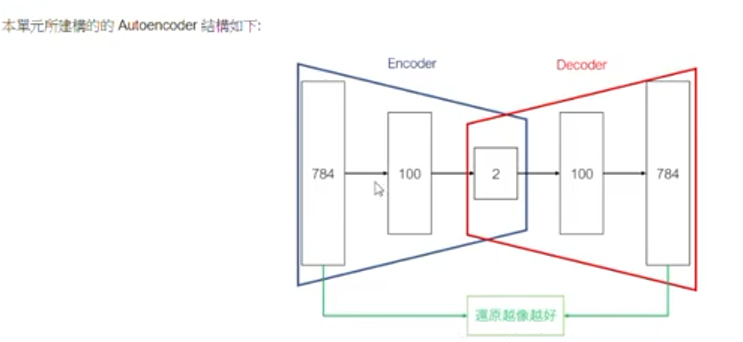

In [14]:
enc_1 = Dense(100, activation='sigmoid')
enc_2 = Dense(2, activation='sigmoid')

dec_2 = Dense(100, activation='sigmoid')
dec_1 = Dense(784, activation='sigmoid')

In [17]:
x= Input(shape=(784,))

In [19]:
enc_x = enc_1(x)
h=enc_2(enc_x)

dec_x = dec_2(h)
x_reconstructed = dec_1(dec_x)

In [20]:
autoencoder = Model(x,x_reconstructed)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
 dense_2 (Dense)             (None, 100)               300       
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [22]:
autoencoder.compile(loss='kullback_leibler_divergence', optimizer='Nadam')

In [23]:
autoencoder.fit(x_train, x_train, batch_size=32, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 10s 3ms/step - loss: -20.5135
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0373
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0468
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0490
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0497
Epoch 6/100
1875/1875 [==============================] - 7s 3ms/step - loss: -22.0499
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0500
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0500
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0500
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0500
Epoch 11/100
1875/1875 [==============================] - 6s 3ms/step - loss: -22.0500
Epoch 12/100
1875/1875 [===========================

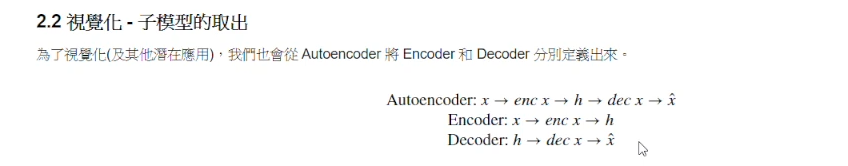